In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [24]:
yyyy = '2024'
mm = '09'
dd = '28'
station_id = '0-250-1001-07151-B'
path = f'../data/{yyyy}/{mm}/{dd}/AP_{station_id}-{yyyy}-{mm}-{dd}.nc'

/tmp/ipykernel_263345/804243362.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(time, altitude, backscatter, vmin=0.01, vmax=10, cmap='bwr', level=200, norm = LogNorm())
/tmp/ipykernel_263345/804243362.py:10: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(time, altitude, backscatter, vmin=0.01, vmax=10, cmap='bwr', level=200, norm = LogNorm())


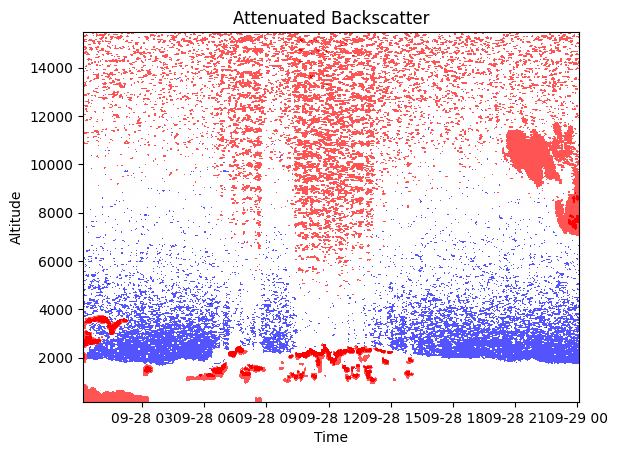

In [28]:
vars = ['attenuated_backscatter_0']
ds = xr.open_dataset(path)[vars].load()

# Extract the data
time = np.array(ds['time'].data)
altitude = np.array(ds['altitude'].data)
backscatter = np.array(ds['attenuated_backscatter_0'].transpose().data)

# Plot the contour without creating a meshgrid
plt.contourf(time, altitude, backscatter, levels=200, vmin=0.01, vmax=10, cmap='bwr', norm = LogNorm())

plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('Attenuated Backscatter')
plt.show()